In [1]:
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [26]:
import networkx as nx
from eppy.bunch_subclass import EpBunch
from geomeppy import IDF
import seaborn as sns
import polars as pl
# from datetime import datetime
# from ladybug.dt import DateTime
# from matplotlib.patches import FancyArrowPatch
# from itertools import accumulate

# from case_edits.ezcase import *
# from helpers.ep_helpers import *
# from helpers.ep_geom_helpers import *
# from helpers.geometry_interfaces import *
# from helpers.helpers import *
# from plan.helpers import get_plans_from_file
# from network.network import *
# from network.visuals import *
# from subsurfaces.logic import get_connecting_surface
# from helpers.read_sql import *

# from case_edits.epcase import EneryPlusCaseEditor
# from helpers.output_requests import request_sql

from helpers.variables import *
from helpers.variable_interfaces import *
from setup.setup import get_case_names, CaseData, retrieve_cases
from setup.plots import *
from setup.data_wrangle import *
from network.data_on_network import *

import matplotlib.cm as cm
import matplotlib as mpl




In [8]:
qoi1 = 'AFN Linkage Node 1 to Node 2 Volume Flow Rate'
qoi12 = 'AFN Linkage Node 2 to Node 1 Volume Flow Rate'

qoi2 = "Site Wind Speed"
qoi3 = "Site Wind Direction"

qoi4 = all_variables.afn.zone["ach"]

In [9]:
case_data = retrieve_cases()
sample_case  = case_data[2]
case_name, idf, sql, path_to_input, path_to_output = sample_case

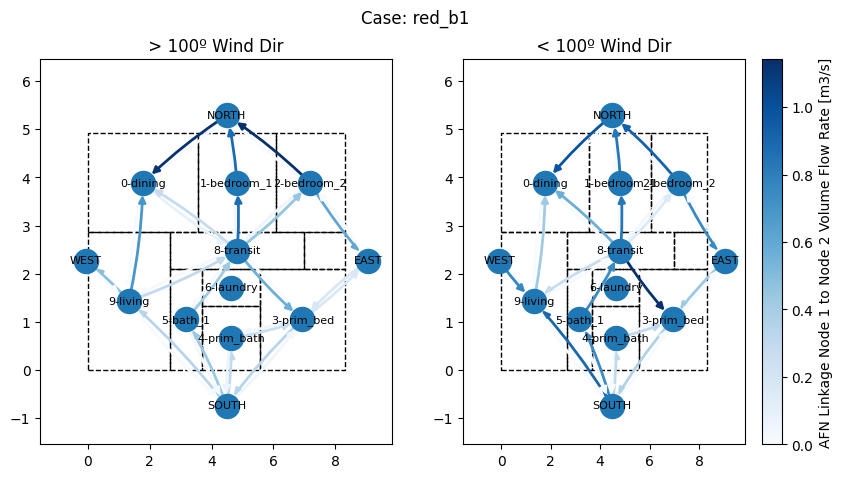

In [31]:
qois = [qoi1, qoi12]
fig = create_data_on_network_fig_facet_winddir(case_data, sample_case, qois)


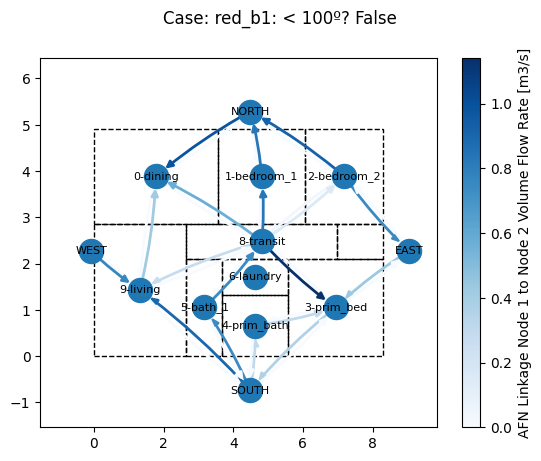

In [19]:
fig = create_data_on_network_fig(case_data, sample_case, qois, False)

In [21]:
pl.selectors.numeric

<function polars.selectors.numeric() -> 'SelectorType'>

In [23]:
type(pl.Float32)

polars.datatypes.classes.DataTypeClass

In [ ]:
pl.DataType.Py

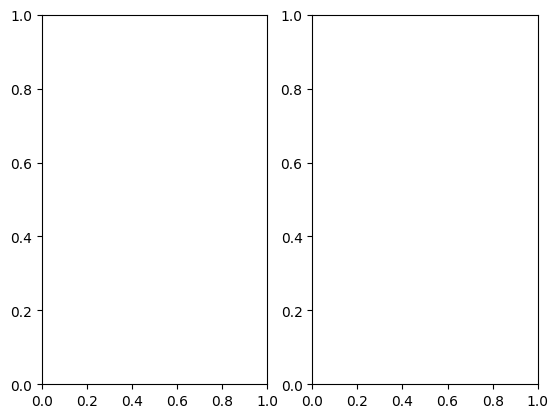

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = ax
ax0.set_title()

In [ ]:
def true_min_max(min_max_pairs: list[tuple[float, float]]):
    min_val = min([m[0] for m in min_max_pairs])
    max_val = max([m[1] for m in min_max_pairs])
    return min_val, max_val

In [13]:
df = create_dataframe_for_all_cases(case_data, qois[0])
df1 = join_any_data(df, case_data, qois[1])
df2 = join_site_data(sample_case, qoi3, df1, 1 )
df2.head()

case_names,space_names,qoi,values,datetimes,qoi_0,values_0,qoi_1,values_1
str,str,str,f64,datetime[μs],str,f64,str,f64
"""amb_b1""","""BLOCK 01 STOREY 0 WALL 0001_2 …","""AFN Linkage Node 1 to Node 2 V…",0.189875,2017-07-01 00:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.163262,"""Site Wind Direction""",305.0
"""amb_b1""","""BLOCK 01 STOREY 0 WALL 0001_2 …","""AFN Linkage Node 1 to Node 2 V…",0.229261,2017-07-01 00:15:00,"""AFN Linkage Node 2 to Node 1 V…",0.157707,"""Site Wind Direction""",300.0
"""amb_b1""","""BLOCK 01 STOREY 0 WALL 0001_2 …","""AFN Linkage Node 1 to Node 2 V…",0.262846,2017-07-01 00:30:00,"""AFN Linkage Node 2 to Node 1 V…",0.13922,"""Site Wind Direction""",295.0
"""amb_b1""","""BLOCK 01 STOREY 0 WALL 0001_2 …","""AFN Linkage Node 1 to Node 2 V…",0.285586,2017-07-01 00:45:00,"""AFN Linkage Node 2 to Node 1 V…",0.125513,"""Site Wind Direction""",290.0
"""amb_b1""","""BLOCK 01 STOREY 0 WALL 0001_2 …","""AFN Linkage Node 1 to Node 2 V…",0.28513,2017-07-01 01:00:00,"""AFN Linkage Node 2 to Node 1 V…",0.124467,"""Site Wind Direction""",290.0


In [16]:
df_high_wind = df2.filter(pl.col("values_1") > 100)
df_low_wind = df2.filter(pl.col("values_1") <= 100)